#1 Installing Required Packages

In [ ]:
pip install --upgrade https://github.com/paudan/scikit-roughsets/tarball/master

  Using cached https://github.com/paudan/scikit-roughsets/tarball/master


#2 Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_curve,classification_report,f1_score
from sklearn.preprocessing  import  MinMaxScaler
from scikit_roughsets.rs_reduction import RoughSetsSelector
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#3 Loading Dataset

In [ ]:
dt = pd.read_csv('/content/gdrive/My Drive/42 Project/heart.csv')

In [ ]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#4 Data Preprocessing

In [ ]:
dt.shape

(303, 14)

###4.2 Checking for null Values

In [ ]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###4.3 Types of Features

In [ ]:
dt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

###4.4 Encoding Categorical Features

In [ ]:
dt.sex=dt.sex.astype('category')
dt.cp=dt.cp.astype('category')
dt.fbs=dt.fbs.astype('category')
dt.restecg=dt.restecg.astype('category')
dt.exang=dt.exang.astype('category')
dt.ca=dt.ca.astype('category')
dt.slope=dt.slope.astype('category')
dt.thal=dt.thal.astype('category')

In [ ]:
model_label_values=dt['target']
model_label=pd.DataFrame(model_label_values)
del dt['target']

In [ ]:
dt1=pd.get_dummies(dt,drop_first=True)
dt1.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


###4.5 Normalizing the dataset using MinMaxScaler

In [ ]:
dt1_scaled=MinMaxScaler().fit_transform(dt1)
dt1_scaled=pd.DataFrame(data=dt1_scaled, columns=dt1.columns)
dt1_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###4.6 Feaure Importance Using ChiSquare Test

In [ ]:
x = dt1_scaled.columns
l=[]
for i in x:
    statistic,p,dof,freq=stats.chi2_contingency(pd.crosstab(dt1_scaled[i],model_label_values))
    prob=0.90
    alpha=1-prob
    critical=stats.chi2.ppf(prob,dof)
    if abs(statistic)>=critical:
        l.append(i)
        print(i,":dependant")
    else:
        print(i,":independant")
    if p<=alpha:
        print(i,":dependant")
    else:
        print(i,":independent")
l

age :independant
age :independent
trestbps :independant
trestbps :independent
chol :independant
chol :independent
thalach :dependant
thalach :dependant
oldpeak :dependant
oldpeak :dependant
sex_1 :dependant
sex_1 :dependant
cp_1 :dependant
cp_1 :dependant
cp_2 :dependant
cp_2 :dependant
cp_3 :independant
cp_3 :independent
fbs_1 :independant
fbs_1 :independent
restecg_1 :dependant
restecg_1 :dependant
restecg_2 :independant
restecg_2 :independent
exang_1 :dependant
exang_1 :dependant
slope_1 :dependant
slope_1 :dependant
slope_2 :dependant
slope_2 :dependant
ca_1 :dependant
ca_1 :dependant
ca_2 :dependant
ca_2 :dependant
ca_3 :dependant
ca_3 :dependant
ca_4 :independant
ca_4 :independent
thal_1 :independant
thal_1 :independent
thal_2 :dependant
thal_2 :dependant
thal_3 :dependant
thal_3 :dependant


['thalach',
 'oldpeak',
 'sex_1',
 'cp_1',
 'cp_2',
 'restecg_1',
 'exang_1',
 'slope_1',
 'slope_2',
 'ca_1',
 'ca_2',
 'ca_3',
 'thal_2',
 'thal_3']

In [ ]:
dt1_scaled_new = dt1_scaled[l]

In [ ]:
dt1_scaled_new.head()

,thalach,oldpeak,sex_1,cp_1,cp_2,restecg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,0.603053,0.370968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885496,0.564516,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.816794,0.129032,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.702290,0.096774,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


##5 Modelling

###5.1 Different Algorithms used for training

In [ ]:
# define models to test:
base_models = [("SVM",      SVC(kernel='rbf',C=0.1,gamma=0.1,probability=True)),                  #Support Vector Machines
               ("KNN", KNeighborsClassifier(n_neighbors=18)),                                     #KNN
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),                       #Logistic Regression model
               ("DT_model", DecisionTreeClassifier(random_state=42)),                             #Decision tree model
               ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),                  #Random Forest
                ("AdaBoost_model",AdaBoostClassifier(DecisionTreeClassifier(),                      #AdaBoost model
                                                    n_estimators=100,
                                                    learning_rate=0.01)),
               ]

###5.2 Train Test Split

In [ ]:
model = base_models
X_train, X_test, y_train, y_test = train_test_split(dt1_scaled,np.ravel(model_label),random_state=25,stratify=model_label)

###5.3 Training and Testing

In [ ]:
train_accuracies = {}
test_accuracies = {}
model = base_models
y_test_pred_values_for_models = []
for name,model in base_models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    fscore_train = f1_score(y_train,y_train_pred)*100
    acc_train = model.score(X_train,y_train)*100

    acc = model.score(X_test,y_test)*100
    y_pred = model.predict(X_test)
    fscore = f1_score(y_test,y_pred)*100
    y_test_pred_values_for_models.append(y_pred)

    train_accuracies[name] = [acc_train,fscore_train]
    test_accuracies[name] = [acc,fscore]

##6 Evaluation

###6.1 Accuracies on Train Data

In [ ]:
names = list(train_accuracies.keys())
models_res = pd.DataFrame(data=train_accuracies.values(),columns=["Accuracy Score","F1 Score"])
models_res.insert(0,"Model",names,True)
models_res.sort_values('F1 Score',ascending=False)

,Model,Accuracy Score,F1 Score
3,DT_model,100.000000,100.000000
4,RF_model,100.000000,100.000000
5,AdaBoost_model,100.000000,100.000000
2,LR_model,83.700441,85.258964
0,SVM,81.938326,83.794466
1,KNN,81.938326,83.400810


###6.2 Accuracies on Test Data

In [ ]:
names = list(test_accuracies.keys())
models_res = pd.DataFrame(data=test_accuracies.values(),columns=["Accuracy Score","F1 Score"])
models_res.insert(0,"Model",names,True)
models_res.sort_values('F1 Score',ascending=False)

,Model,Accuracy Score,F1 Score
2,LR_model,89.473684,90.476190
1,KNN,89.473684,90.243902
0,SVM,86.842105,88.095238
4,RF_model,82.894737,84.337349
3,DT_model,75.000000,77.108434
5,AdaBoost_model,73.684211,75.609756


###6.3 Classification Report for Logistic Regression Algorithm

In [ ]:
print(classification_report(y_test,y_test_pred_values_for_models[2], target_names=["Yes","No"]))

              precision    recall  f1-score   support

         Yes       0.91      0.86      0.88        35
          No       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



###6.4 Precision Recall Curve and ROC Curve for Logistic Regression Algorithm

In [ ]:
from sklearn.metrics import roc_curve,auc#x-axis->False positives,y-axis->true positives
from sklearn.metrics import average_precision_score#weighted mean of precision with weight
def plotting(true_values,pred_values):
    fig,axe=plt.subplots(1,2,figsize=(12,6))
    precision,recall,threshold = precision_recall_curve(true_values,pred_values[:,1])#returns three arrays of precision,recalls and thresholds with respect to which those are attained
    axe[0].plot(precision,recall,'r--')
    axe[0].set_xlabel('Precision')
    axe[0].set_ylabel('Recall')
    axe[0].set_title("Average Precision Score : {}".format(average_precision_score(true_values,pred_values[:,1])))#probabilities of 1's-pred[:,1] means
    fpr,tpr,threshold = roc_curve(true_values,pred_values[:,1])#fpr->false positives,tpr->true positive
    axe[1].plot(fpr,tpr)
    axe[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))#area under curve
    axe[1].set_xlabel('False Positive Rate')
    axe[1].set_ylabel('True Positive Rate')

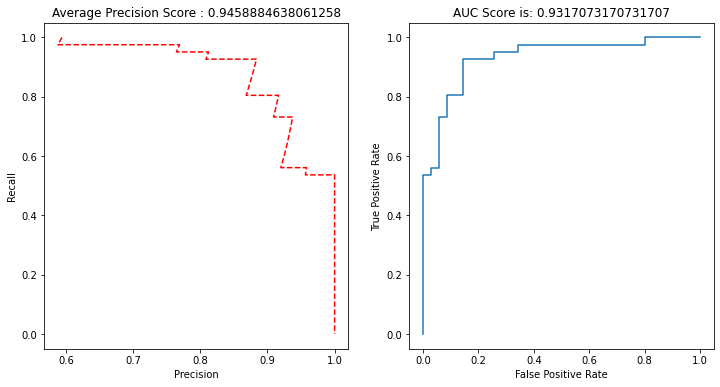

In [ ]:
plotting(y_test,base_models[2][1].predict_proba(X_test))

##7 Feature Importance using Rough sets

In [ ]:
dt1_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df1=1000*dt1_scaled
df1.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,708.333333,481.132075,244.292237,603.053435,370.967742,1000.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0
1,166.666667,339.622642,283.105023,885.496183,564.516129,1000.0,0.0,1000.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0
2,250.000000,339.622642,178.082192,770.992366,225.806452,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0
3,562.500000,245.283019,251.141553,816.793893,129.032258,1000.0,1000.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0
4,583.333333,245.283019,520.547945,702.290076,96.774194,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0


###7.1 segregating input features and output feature

In [ ]:
x_data = df1.iloc[:,:-1]
y_data = model_label
x_data,y_data

(            age    trestbps        chol     thalach  ...  ca_3  ca_4  thal_1  thal_2
 0    708.333333  481.132075  244.292237  603.053435  ...   0.0   0.0  1000.0     0.0
 1    166.666667  339.622642  283.105023  885.496183  ...   0.0   0.0     0.0  1000.0
 2    250.000000  339.622642  178.082192  770.992366  ...   0.0   0.0     0.0  1000.0
 3    562.500000  245.283019  251.141553  816.793893  ...   0.0   0.0     0.0  1000.0
 4    583.333333  245.283019  520.547945  702.290076  ...   0.0   0.0     0.0  1000.0
 ..          ...         ...         ...         ...  ...   ...   ...     ...     ...
 298  583.333333  433.962264  262.557078  396.946565  ...   0.0   0.0     0.0     0.0
 299  333.333333  150.943396  315.068493  465.648855  ...   0.0   0.0     0.0     0.0
 300  812.500000  471.698113  152.968037  534.351145  ...   0.0   0.0     0.0     0.0
 301  583.333333  339.622642   11.415525  335.877863  ...   0.0   0.0     0.0     0.0
 302  583.333333  339.622642  251.141553  786.259542  

###7.2 converting the values to integer type

In [ ]:
x_data = x_data.values.astype(int)
y_data = y_data.values.astype(int)
x_data,y_data

(array([[ 708,  481,  244, ...,    0, 1000,    0],
        [ 166,  339,  283, ...,    0,    0, 1000],
        [ 250,  339,  178, ...,    0,    0, 1000],
        ...,
        [ 812,  471,  152, ...,    0,    0,    0],
        [ 583,  339,   11, ...,    0,    0,    0],
        [ 583,  339,  251, ...,    0,    0, 1000]]), array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
    

###7.3 Using RoughSets

In [ ]:
selector = RoughSetsSelector()
X_selected = selector.fit(x_data, y_data).transform(x_data)

/usr/local/lib/python3.7/dist-packages/scikit_roughsets/roughsets.py:16: RuntimeWarning: overflow encountered in long_scalars
  yy += x[i] * b**(a-(i+1))


In [ ]:
X_selected

array([[ 708,  481,  244],
       [ 166,  339,  283],
       [ 250,  339,  178],
       [ 562,  245,  251],
       [ 583,  245,  520],
       [ 583,  433,  150],
       [ 562,  433,  383],
       [ 312,  245,  312],
       [ 479,  735,  166],
       [ 583,  528,   95],
       [ 520,  433,  257],
       [ 395,  339,  340],
       [ 416,  339,  319],
       [ 729,  150,  194],
       [ 604,  528,  358],
       [ 437,  245,  212],
       [ 604,  245,  488],
       [ 770,  528,  228],
       [ 291,  528,  276],
       [ 833,  433,  257],
       [ 624,  386,  246],
       [ 312,  339,  244],
       [ 270,  433,  228],
       [ 666,  528,  267],
       [ 229,  433,  166],
       [ 874,  622,  401],
       [ 624,  528,  196],
       [ 458,  150,  111],
       [ 749,  433,  664],
       [ 499,  339,  162],
       [ 250,  103,  164],
       [ 749,  245,  116],
       [ 312,  339,  212],
       [ 520,  292,  335],
       [ 458,  292,  198],
       [ 354,  452,  116],
       [ 520,  386,  406],
 

In [ ]:
dt_rough = df1[['age','trestbps','chol']]
dt_rough.head()

,age,trestbps,chol
0,708.333333,481.132075,244.292237
1,166.666667,339.622642,283.105023
2,250.000000,339.622642,178.082192
3,562.500000,245.283019,251.141553
4,583.333333,245.283019,520.547945


###7.4 Train Test Split

In [ ]:
model = base_models
X_train, X_test, y_train, y_test = train_test_split(dt_rough,np.ravel(model_label),random_state=25,stratify=model_label)

###7.5 Training and Testing

In [ ]:
train_accuracies = {}
test_accuracies = {}
for name,model in base_models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    fscore_train = f1_score(y_train,y_train_pred)*100
    acc_train = model.score(X_train,y_train)*100

    acc = model.score(X_test,y_test)*100
    y_pred = model.predict(X_test)
    fscore = f1_score(y_test,y_pred)*100
    y_test_pred_values_for_models.append(y_pred)

    train_accuracies[name] = [acc_train,fscore_train]
    test_accuracies[name] = [acc,fscore]

##8 Evaluation

###8.1 Accuracies on Train Data

In [ ]:
names = list(train_accuracies.keys())
models_res = pd.DataFrame(data=train_accuracies.values(),columns=["Accuracy Score","F1 Score"])
models_res.insert(0,"Model",names,True)
models_res.sort_values('F1 Score',ascending=False)

,Model,Accuracy Score,F1 Score
3,DT_model,100.000000,100.000000
4,RF_model,100.000000,100.000000
5,AdaBoost_model,100.000000,100.000000
0,SVM,54.625551,70.655271
2,LR_model,61.233480,67.407407
1,KNN,64.757709,67.213115


###8.2 Accuracies on Test Data

In [ ]:
names = list(test_accuracies.keys())
models_res = pd.DataFrame(data=test_accuracies.values(),columns=["Accuracy Score","F1 Score"])
models_res.insert(0,"Model",names,True)
models_res.sort_values('F1 Score',ascending=False)

,Model,Accuracy Score,F1 Score
0,SVM,53.947368,70.085470
2,LR_model,59.210526,65.934066
1,KNN,55.263158,60.465116
4,RF_model,52.631579,56.097561
5,AdaBoost_model,51.315789,51.948052
3,DT_model,48.684211,49.350649
